# Gradient Descent for Linear Regression

In [1]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d  # needed to plot 3-D surfaces
import numpy as np

In [41]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

In [36]:
X[:,0]

array([2104., 1600., 2400., 1416., 3000., 1985., 1534., 1427., 1380.,
       1494., 1940., 2000., 1890., 4478., 1268., 2300., 1320., 1236.,
       2609., 3031., 1767., 1888., 1604., 1962., 3890., 1100., 1458.,
       2526., 2200., 2637., 1839., 1000., 2040., 3137., 1811., 1437.,
       1239., 2132., 4215., 2162., 1664., 2238., 2567., 1200.,  852.,
       1852., 1203.])

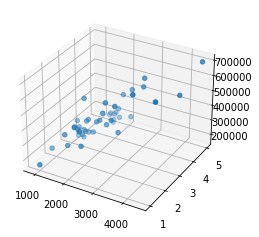

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],y)

---
## Linear Hypothesis with Multiple Features
    
**Parameters**:
    
    x :
        A row vector of X with j columns.
    
    theta :
        The parameters/weights of the features with j columns
    

**Returns**:
    
    The dot product of the two vectors.

In [31]:
def hyp(x, theta):
    
    return np.dot(x,theta)

---
## Cost Function

**Parameters**:
    
    X:
    
    
    y:
    
    
    theta:



**Returns**:
    
    

In [10]:
def cost(X, y, theta):
    
    m = y.size
    
    J = 0
    
    for i in range(m):
        J += ( hyp(X[i], theta) - y[i] )**2 
        # finds the square error of one training example and adds that to the cost 
    
    return J/(2*m) 

ValueError: shapes (47,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

---
## Normalize Features
    
**Parameters**:
    
    X: 
    


**Returns**:
    

In [48]:
def normalizeFeatures(X):
    
    #rows = X.shape[0]
    cols = X.shape[1]
    
    Xs = X.copy()
    
    for i in range(cols):
        
        Xs[:,i] = ( X[:,i] - np.mean(X[:,i]) ) / np.std(X[:,i])
        
    return Xs

## Gradient Descent

Parameters:

    X: 
    
    
    y:
    
    
    theta:
    
    
    alpha:
    
    
    iters:
    
---

Returns:


In [97]:
def gradientDescent(X, y, theta, alpha, iters):
    k = theta.size
    m = y.size
    Js = []
    for t in range(iters):
        temp = theta.copy()
        for j in range(k):
            delta = 0
            for i in range(m):
                delta += ( hyp(X[i], theta) - y[i] )*X[i, j]
            temp[j] -= alpha * delta
        theta = temp
        Js.append(cost(X, y, theta))
    return theta, Js
        

In [98]:
theta = np.zeros(3)
Xs = normalizeFeatures(X)
Xs = np.concatenate([np.ones((m, 1)), Xs], axis=1)
alpha = 0.01

someX = np.concatenate([np.ones((m, 1)), X], axis=1)

k = theta.size
m = y.size

#print(Xs[:3])
for t in range(20):
    temp = theta.copy()
    #print(temp)
    for j in range(k):
        delta = 0
        for i in range(m):
            delta += ( hyp(someX[i], theta) - y[i] )*someX[i, j]
        temp[j] -= alpha * delta / m
        #print("changetheta[",j,"]=",alpha*delta/m)
    theta = temp
    print(theta)
    #print(cost(Xs, y, theta))

[3.40412660e+03 7.64209128e+06 1.12036770e+04]
[-1.52887438e+08 -3.53114222e+11 -5.10013688e+08]
[7.06455344e+12 1.63165217e+16 2.35664673e+13]
[-3.26435277e+17 -7.53945500e+20 -1.08894729e+18]
[1.50837546e+22 3.48379286e+25 5.03175201e+22]
[-6.96982429e+26 -1.60977321e+30 -2.32504627e+27]
[3.22058081e+31 7.43835786e+34 1.07434551e+32]
[-1.48814954e+36 -3.43707841e+39 -4.96428086e+36]
[6.87636538e+40 1.58818764e+44 2.29386955e+41]
[-3.17739580e+45 -7.33861634e+48 -1.05993953e+46]
[1.46819482e+50 3.39099036e+53 4.89771443e+50]
[-6.78415966e+54 -1.56689151e+58 -2.26311087e+55]
[3.13478985e+59 7.24021227e+62 1.04572671e+60]
[-1.44850768e+64 -3.34552031e+67 -4.83204060e+64]
[6.69319034e+68 1.54588094e+72 2.23276464e+69]
[-3.09275521e+73 -7.14312770e+76 -1.03170448e+74]
[1.42908453e+78 3.30065997e+81 4.76724739e+78]
[-6.60344083e+82 -1.52515210e+86 -2.20282533e+83]
[3.05128422e+87 7.04734495e+90 1.01787028e+88]
[-1.40992183e+92 -3.25640116e+95 -4.70332300e+92]


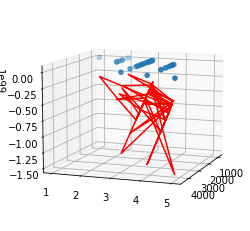

In [96]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],y)
ax.plot(X[:,0],X[:,1],np.dot(someX,theta),'r')
ax.view_init(10,20)

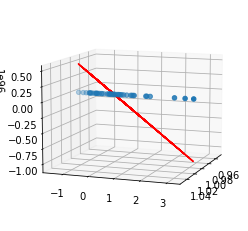

In [94]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Xs[:,0],Xs[:,1],y)
ax.plot(Xs[:,0],Xs[:,1],np.dot(Xs,theta),'r')
ax.view_init(10,20)

In [86]:
newX = normalizeFeature(X)

In [91]:
gradientDescent(X, y, theta, 0.01, 10)

(array([1066.60437288,  547.28711846]),
 [65450790000.665794,
  65449851510.961136,
  65449843731.16231,
  65449843645.611404,
  65449843644.4273,
  65449843644.408806,
  65449843644.4085,
  65449843644.40849,
  65449843644.40849,
  65449843644.40849])